# The lorenz system
the lorenz system is composed of 3 diffential equations:

\begin{aligned}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z) - y \\
\frac{dz}{dt} &= xy - βz \\
\end{aligned}

# Get all requiered packages 

In [1]:
using Pkg

In [2]:
Pkg.add("DifferentialEquations")
Pkg.add("DataFrames")
Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100,0%                                     12,2%                    63,8%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [3]:
using DifferentialEquations
using DataFrames 
using Plots 

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


# Define the lorenz system

In [4]:
function lorenz(du,u,p,t)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

In [5]:
# define the initial Values --> [1*m] vector 
u0 = [0.1; 0.0; 0.0]

3-element Array{Float64,1}:
 0.1
 0.0
 0.0

In [6]:
#define the time 
start = 0.0
stop = 30.0
timeSteps = 0.1 

0.1

# Solve

In [7]:
# time array (must be a tuple)
tspan = (start,stop)

problem = ODEProblem(lorenz,u0,tspan)
solution = solve(problem, saveat=timeSteps)

retcode: Success
Interpolation: 1st order linear
t: 301-element Array{Float64,1}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 28.9
 29.0
 29.1
 29.2
 29.3
 29.4
 29.5
 29.6
 29.7
 29.8
 29.9
 30.0
u: 301-element Array{Array{Float64,1},1}:
 [0.1, 0.0, 0.0]
 [0.127218562452828, 0.2554234410784424, 0.0011425675093969046]
 [0.3948237533848877, 0.8594521939565076, 0.012869179520455097]
 [1.285229266278249, 2.802112113575732, 0.1370110903352282]
 [4.154008692004485, 8.964224386666698, 1.4366258072749998]
 [12.300585287945303, 23.866243453389142, 13.078011623274246]
 [19.505343273788434, 14.778389980776321, 46.825842400879125]
 [5.728928536262144, -8.771160488909556, 37.28397786242986]
 [-3.6032201243445328, -8.63969215155843, 28.488141405201524]
 [-6.631811041636006, -8.454859815867252, 25.830429515093385]
 [-8.106246666610799, -9.384550812720855, 25.614059416528786]
 [-9.170540618187228, -9.913442976212952, 27.07948487175866]
 [-9.380282027101572, -9.0

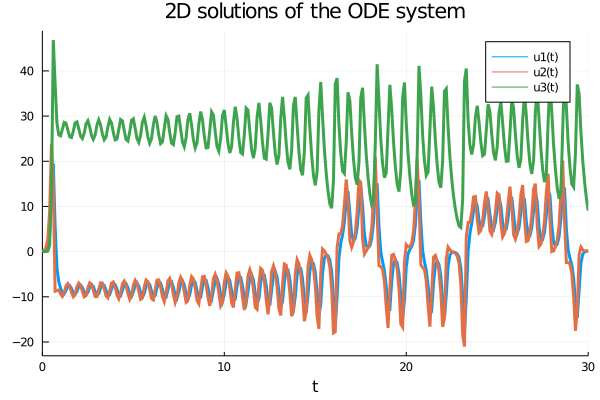

In [9]:
# view solution in DataFrame
simulatedResultsDf = DataFrame(solution')

# transform Df into Matrix
simulatedResultsMx = simulatedResultsDf |> Matrix 

# plot the solution
plot(solution, linewidth=3,title="2D solutions of the ODE system")